# Introduction
##    Predicting the house price is a very interesting and practical problem. There are around 80 features in this excercise. We will get some exposure on data exploration, feature engineering, model setups and result cross-validation. As a supervised prediciton problem, we can compare different models based on MAE, in this case,and pick the best model based on your pre-processed features. 

## This version is around 3% in ranking.

In [1]:
# check file paths in input data
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# 1) Load the data
## * csv file reading
## * output format setup (I prefer table output a. with grid, and b. without hidden columns).
## * using describe(), info() function to check out the basic information of the data.

In [2]:
# initial set up
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# retrieve data from given link
iowa_file_path = '../input/home-data-for-ml-course/train.csv'
test_file_path = '../input/home-data-for-ml-course/test.csv'

original_train = pd.read_csv(iowa_file_path)
df_train = pd.read_csv(iowa_file_path, index_col = 0)
df_test = pd.read_csv(test_file_path, index_col = 0)

Use setup below to show the table with gridlines

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [5]:
#print the whole table without omission
pd.options.display.max_columns = None
df_train.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [6]:
print("train 's size : " + str(df_train.shape))

train 's size : (1460, 80)


In [7]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
# Check for duplicates
idsUnique = len(set(original_train.Id))
idsTotal = original_train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 1460 total entries


In [9]:
numerical_cols = [cname for cname in df_train.columns if df_train[cname].dtype in ['int64', 'float64']]
df_train[numerical_cols].describe().round(decimals=2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


# 1.1 analyze Y
## In summary, the log Y has better skew than original Y or other linear transformation, such as Z-score

In [10]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

*min is larger than 0 it means no missing value*

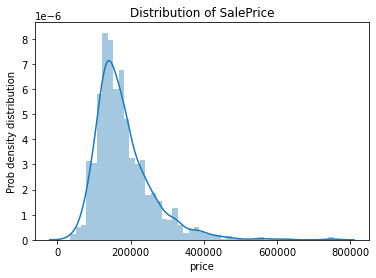

In [11]:
#histogram
label = df_train.SalePrice
plt.figure()
sns.distplot(label)
plt.title('Distribution of SalePrice')
plt.xticks([0, 2e5, 4e5,6e5, 8e5])
plt.xlabel("price")
plt.ylabel("Prob density distribution")
plt.show()

In [12]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


*It is not normal distribution and have positive skewness*

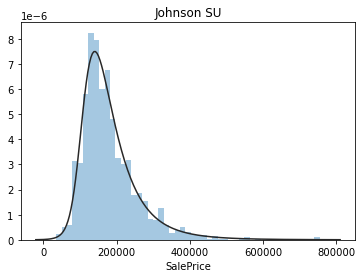

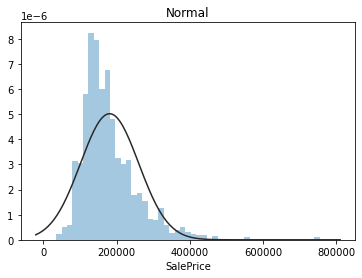

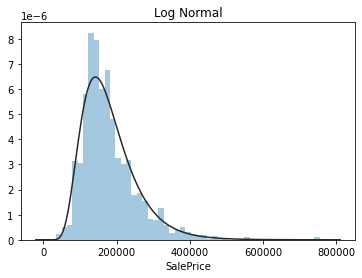

In [13]:
y = df_train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm);

*It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.*

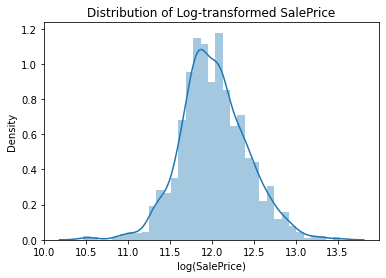

In [14]:
label_log = np.log(df_train.SalePrice)
sns.distplot(label_log)
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

In [15]:
print('SalePrice (same as to z_score) has a skew of ' + str(label.skew().round(decimals=1)) + 
      '  the log-transformed SalePrice improves the skew to ' + 
      str(np.log(label).skew().round(decimals=1)))

SalePrice (same as to z_score) has a skew of 1.9  the log-transformed SalePrice improves the skew to 0.1


# 2) Look brief through all the columns

In [16]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
# missing data
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
# percent and total 
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


# 3) Exploration of numerical data
## 1. plot distribution of each numerical features.
## 2. plot scatter plot of each feature against the label target to check the general trend, and possible outliers.
## 3. Use heatmap to check the correlation with the salePrice. 
## 4. Replot the scatter plot again, but **IN ORDER** of importance for each numerical features, so that we can keep most important ones, and throw away non-important features (here, be careful to replace the missing or NA data for now, leaving to the end and  to use imputer.fit_transform to get better replacement for filling those missing values)

In [18]:
#Show numerical columns with most null values:
df_train[numerical_cols].isna().sum().sort_values(ascending = False).head()

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
OpenPorchSF       0
KitchenAbvGr      0
dtype: int64

In [19]:
#Shapiro-Wilk Test
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df_train[numerical_cols])
normal = normal.apply(test_normality)
print(not normal.any())

False


*none of numerical variables has normal distribution so these should be transformed as well.*

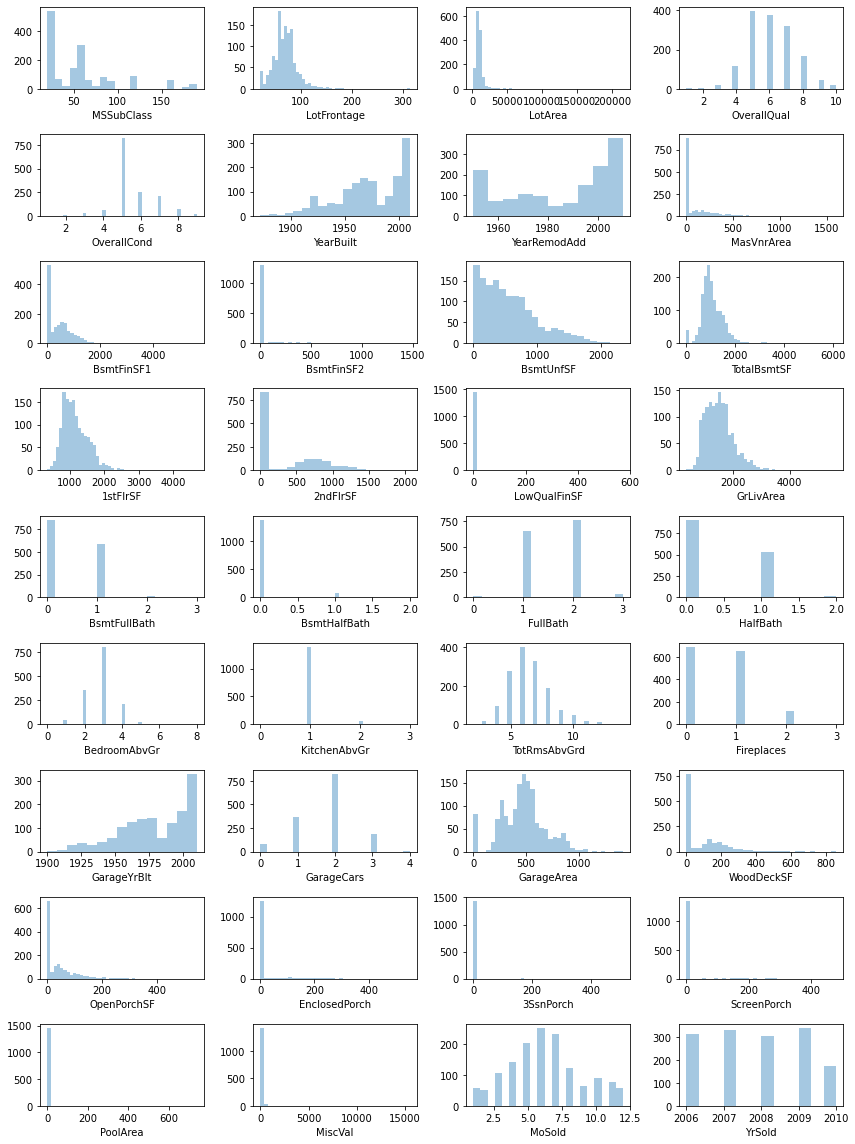

In [20]:
num_attributes = df_train[numerical_cols].drop('SalePrice', axis=1).copy()

fig = plt.figure(figsize=(12,16))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna(),kde=False)
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

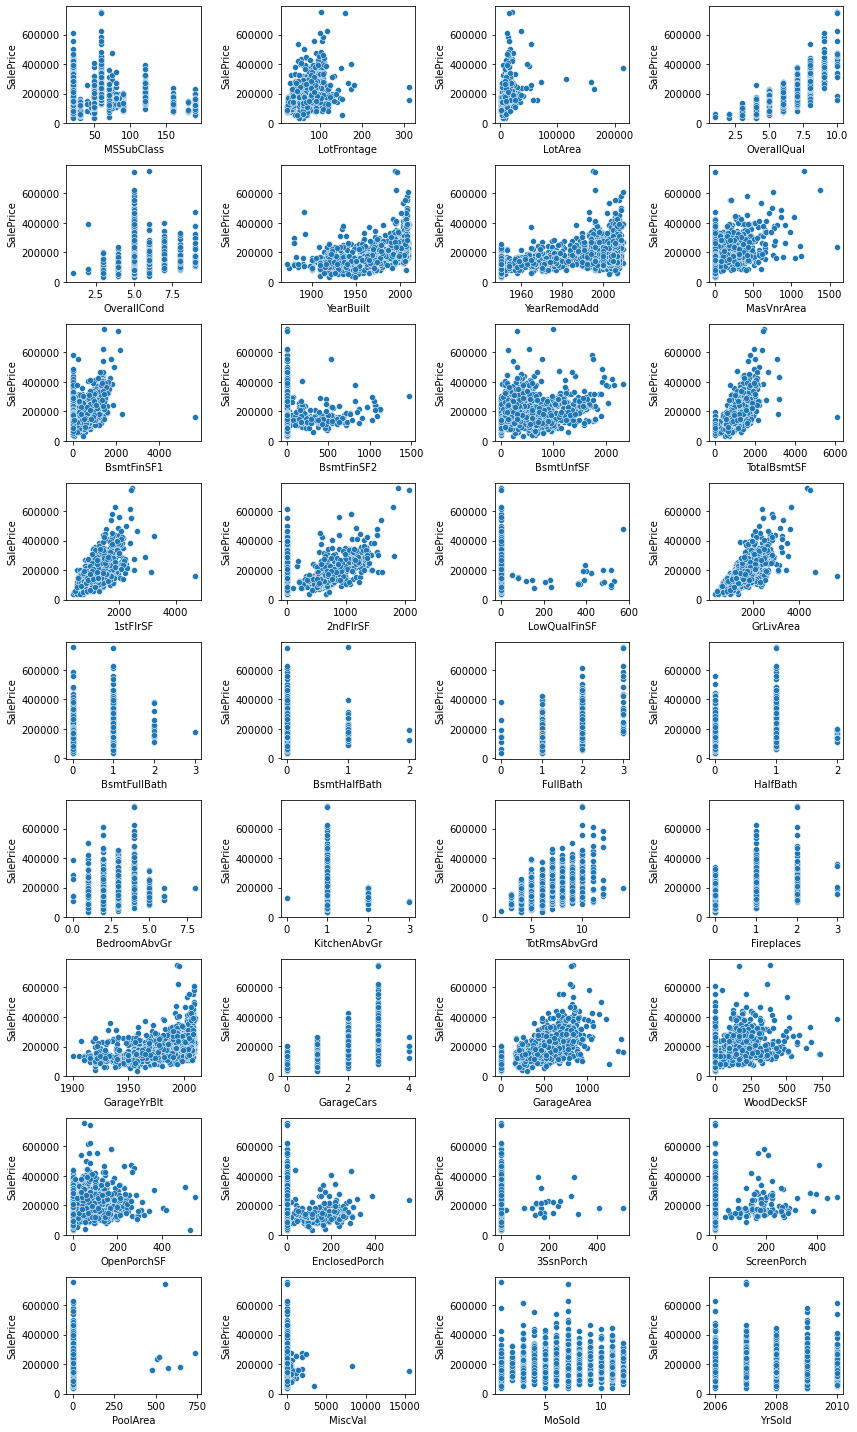

In [21]:
f = plt.figure(figsize=(12,20))
for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i + 1)
    sns.scatterplot(num_attributes.iloc[:, i], label)
plt.tight_layout()
plt.show()

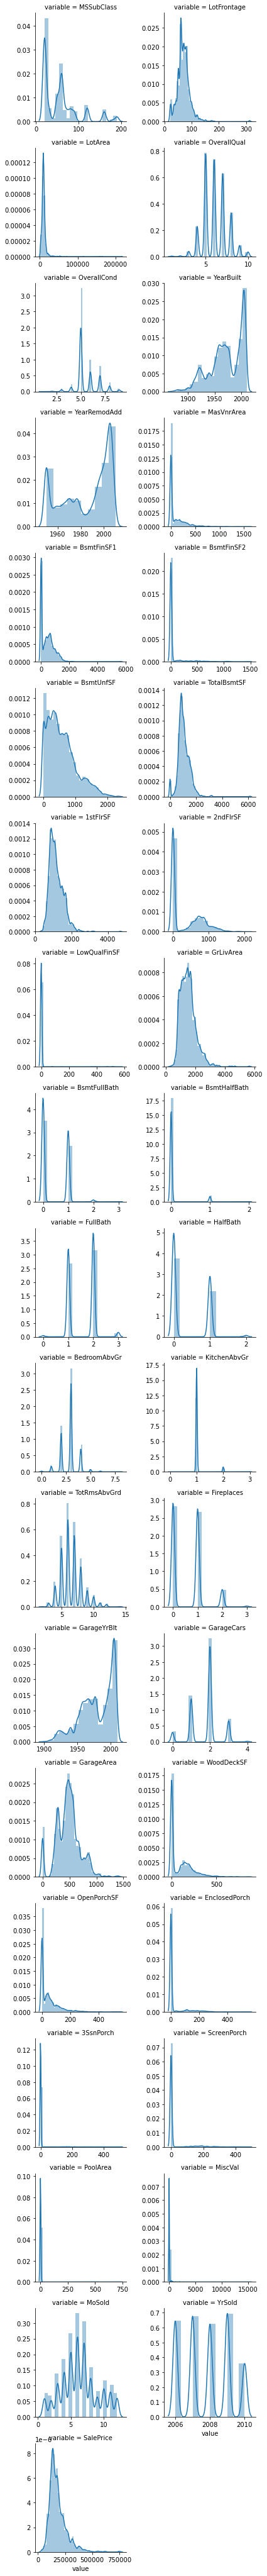

In [22]:
f = pd.melt(df_train, value_vars=numerical_cols)
g = sns.FacetGrid(f, col = "variable",  col_wrap = 2, sharex = False, sharey = False)
g = g.map(sns.distplot, "value", kde_kws = {'bw':0.1})

*After check Some independent variables look like good candidates for log transformation: TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea and others.*

# 3.2 analyze the numerical data

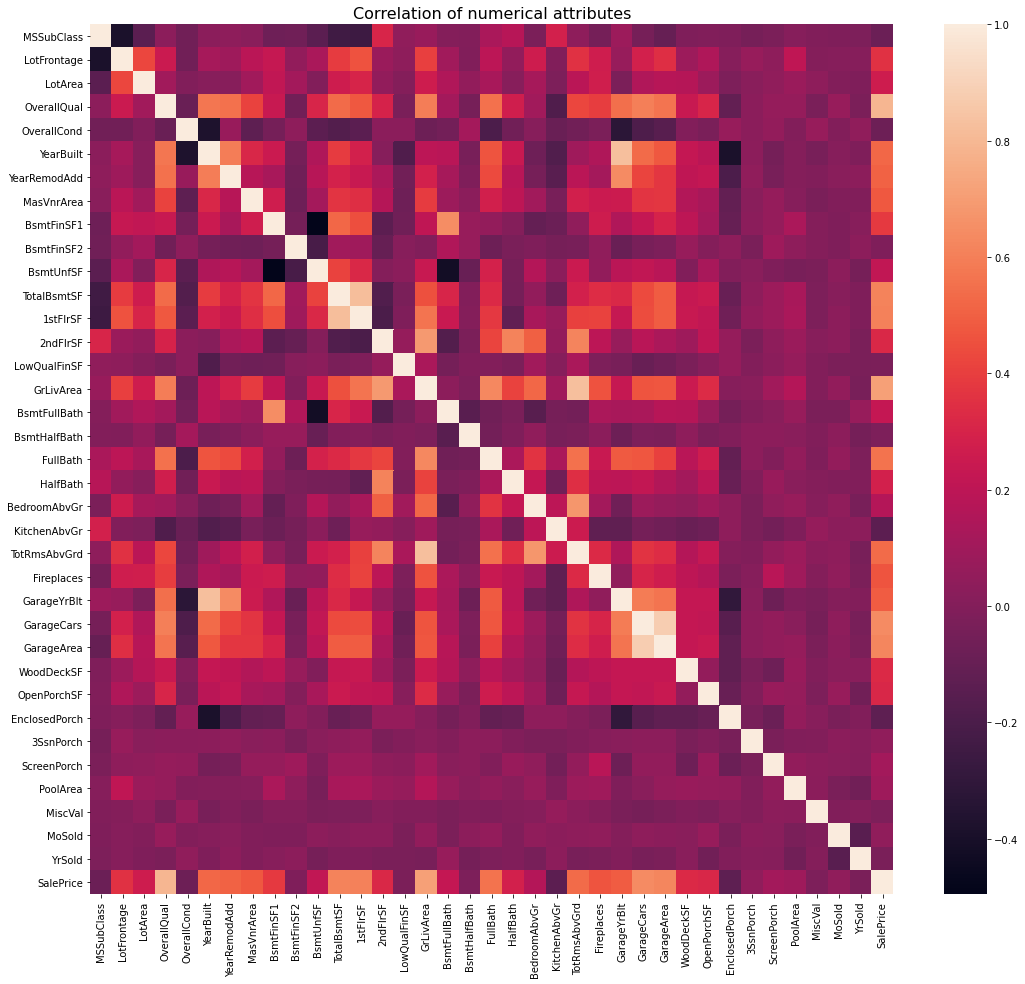

In [23]:
correlation = df_train.corr()
f, ax = plt.subplots(figsize=(18,16))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

In [24]:
# need this for section 4
corrList_Order = correlation['SalePrice'].sort_values(ascending=False)[1:]
print(corrList_Order)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


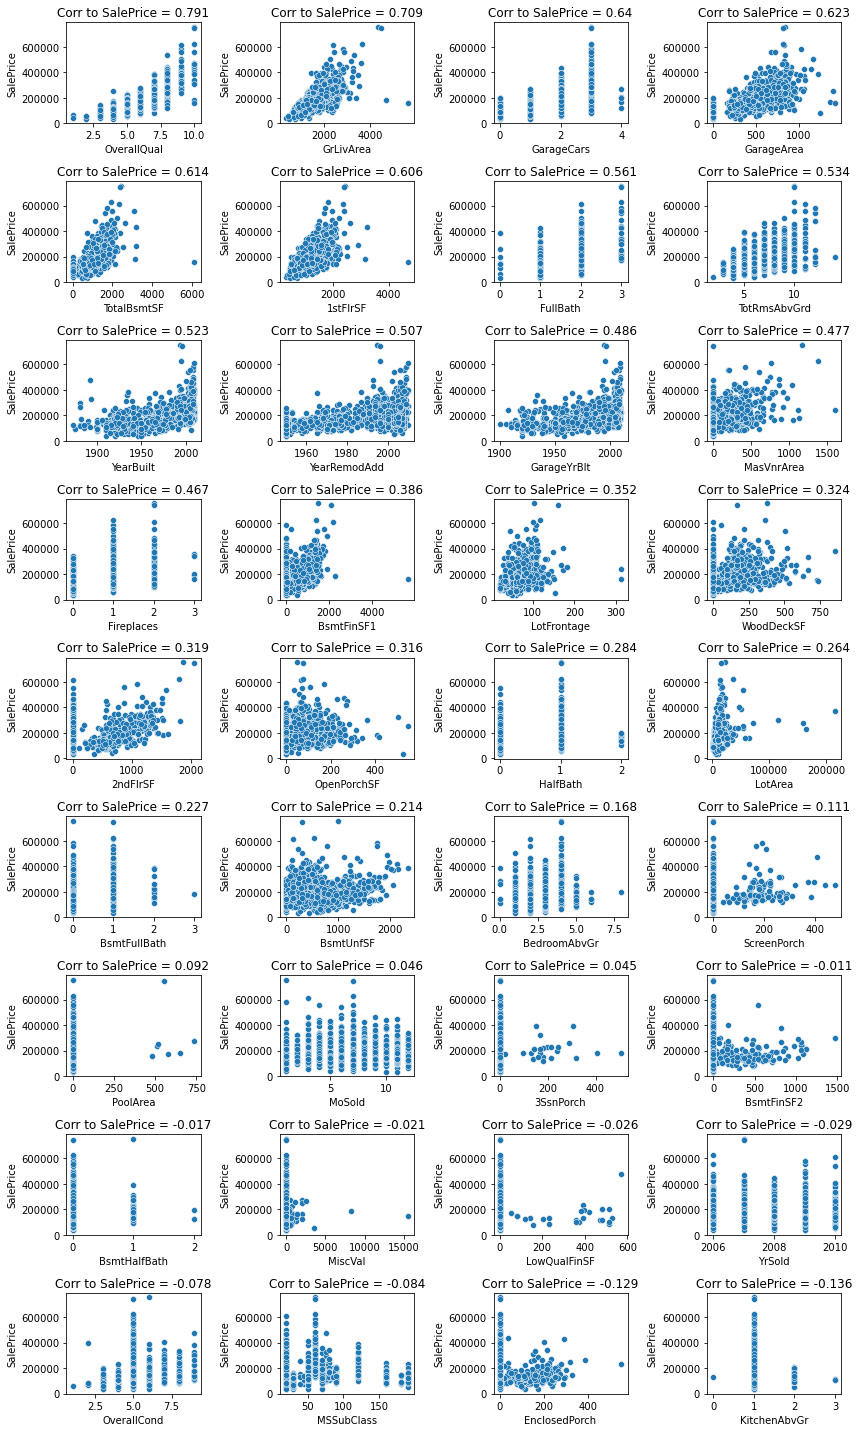

In [25]:
corr_to_price = correlation['SalePrice']
f = plt.figure(figsize = (12,20))
for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(num_attributes.loc[:,corrList_Order.index[i]], label)
    plt.title('Corr to SalePrice = '+ str(np.around(corrList_Order[i], decimals=3)))
plt.tight_layout()
plt.show()

In [26]:
#check how many Garage built later
df_train[['GarageYrBlt','YearBuilt']].T
tt = (df_train.GarageYrBlt - df_train.YearBuilt)
#plt.hist(tt)
#plt.show()
print('totoal Null:{}'.format(tt.isna().sum()))
print('totoal remodeled Garage:{}'.format(tt[tt > 0].count()))
print('error data with garage built earlier than house:{}'.format(tt[tt < 0].count()))

totoal Null:81
totoal remodeled Garage:281
error data with garage built earlier than house:9


# 3) Analyze Categorical data
### a) check the general information with describe, such as cardinality, for high cardinality column, which I will throw it away in the model setup
### b) converted category rating data to numerical data, so that I can carry out importance analysis
### c) others will do one-hot encoding.**

In [27]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in df_train.columns if df_train[cname].dtype == "object"]
print(categorical_cols,'\n Total categorical data =', len(categorical_cols))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 
 Total categorical data = 43


In [28]:
df_train[categorical_cols].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [29]:
# Select categorical columns with relatively high cardinality (convenient but arbitrary)
categorical_highCard_cols = [cname for cname in df_train.columns if
                    df_train[cname].nunique() > 9 and 
                    df_train[cname].dtype == "object"]
print(categorical_highCard_cols,'\n Total categorical data =', len(categorical_highCard_cols))

['Neighborhood', 'Exterior1st', 'Exterior2nd'] 
 Total categorical data = 3


In [30]:
# check categorical mising values
categorical_attributes = df_train[categorical_cols].copy()
categorical_attributes
categorical_attributes.isna().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Functional         0
KitchenQual        0
CentralAir         0
HeatingQC          0
dtype: int64

In [31]:
df_train[categorical_cols].head(20)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
6,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
7,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
8,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
9,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml


*from above data frame and especically from the file 'data_description.txt'
 we can see that rating columns are "ExterQual","ExterCond","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1","BsmtFinType2","HeatingQC", "CentralAir","Electrical","KitchenQual","Functional","FireplaceQu","GarageCond", "GarageQual", "PoolQC", "Fence"*

## read data description, NumCol_3 are columns with rating, which I convert to numerical data with equal spacing for different ratings.

In [32]:
# categorical data to numerical data for better analysis
# don't analyze "Fence" and "PoolQC" because most of data from these two columns are missing
NumCol_3 = ["ExterQual","ExterCond","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
            "BsmtFinType2","HeatingQC", "CentralAir","Electrical","KitchenQual", "Functional",
            "FireplaceQu","GarageCond", "GarageQual"]#, "PoolQC", "Fence"]
categorical_attributes[NumCol_3].isna().sum().sum()

1040

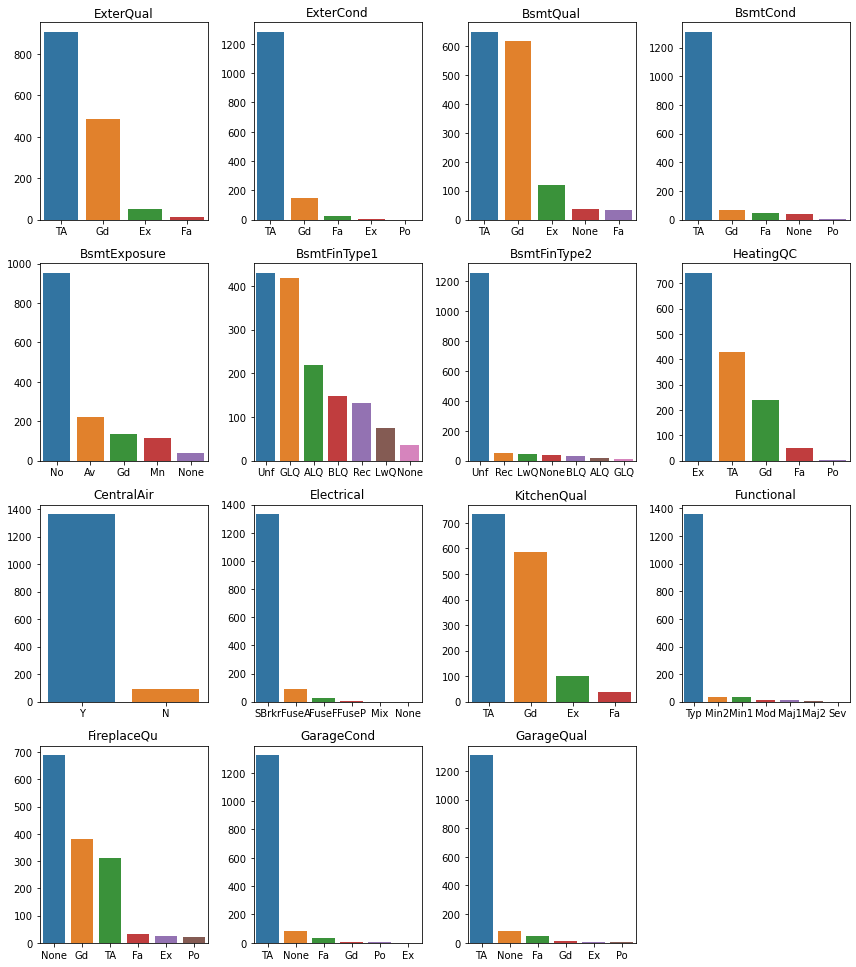

In [33]:
# need to read data description from file 'data_description.txt', need to change all the data with ratings to numerical data
# those categorical data needs to change to numerical
# I assume linear changes for different level of ratings

NumCol_3 = ["ExterQual","ExterCond","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
            "BsmtFinType2","HeatingQC", "CentralAir","Electrical","KitchenQual", "Functional",
            "FireplaceQu","GarageCond", "GarageQual"]#, "PoolQC", "Fence"]

# first fill missing values for rating categorical columns
for cat in NumCol_3:
    categorical_attributes[cat] = categorical_attributes[cat].fillna("None")

f = plt.figure(figsize=(12,20))
for i in range(len(NumCol_3)):
    f.add_subplot(6, 4, i+1)
    sns.barplot(categorical_attributes[NumCol_3[i]].value_counts().index, categorical_attributes[NumCol_3[i]].value_counts().values)
    plt.title(str(categorical_attributes[NumCol_3[i]].name))
plt.tight_layout()
plt.show()

In [34]:
# best value should be based on regression, but i use given number for now
def cleUp(X):
    cat_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

    # not fill na to None, because, after it changed to numerical data, fit_transform the NA could get better results
    
    cleanup_nums = {"ExterQual":      {"Ex": 5, "Gd": 4,"TA":3, "Fa":2, "Po":1,"None":0},
                    "ExterCond":      {"Ex": 5, "Gd": 4,"TA":3, "Fa":2, "Po":1,"None":0},
                    "BsmtQual":       {"Ex": 5, "Gd": 4,"TA":3, "Fa":2, "Po":1, "None":0},
                    "BsmtCond":       {"Ex": 5, "Gd": 4,"TA":3, "Fa":2, "Po":1, "None":0},
                    "BsmtExposure":   { "Gd": 4,"Av":3, "Mn":2, "No":1, "None":0},
                    "BsmtFinType1":   { "GLQ": 6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "None":0},
                    "BsmtFinType2":   { "GLQ": 6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "None":0},
                    "HeatingQC":      {"Ex": 5, "Gd": 4,"TA":3, "Fa":2, "Po":1,"None":0},
                    "CentralAir":     {"Y": 1, "N": 0,"None":0},
                    "Electrical":     {"SBrkr": 4, "FuseA": 3,"FuseF":2, "FuseP":1, "Mix": 2.5, "None": 0},
                    "KitchenQual":    {"Ex": 5, "Gd": 4,"TA":3, "Fa":2, "Po":1,"None":0},
                    "Functional":     {"Typ": 7,"Min1":6, "Min2":5, "Mod":4, "Maj1":3, "Maj2":2, "Sev":1, "Sal":0 ,"None":0 },
                    "FireplaceQu":    {"Ex": 5, "Gd": 4,"TA":3, "Fa":2, "Po":1, "None":0},
                    "GarageQual":     {"Ex": 5, "Gd": 4,"TA":3, "Fa":2, "Po":1, "None":0},
                    "GarageCond":     {"Ex": 5, "Gd": 4,"TA":3, "Fa":2, "Po":1, "None":0},
#                     "PoolQC":         {"Ex": 5, "Gd": 4,"TA":3, "Fa":2, "Po":1,"None":0},
#                     "Fence":          {"GdPrv": 4,"MnPrv":3, "GdWo":2, "MnWw":1,"None":0}
                   }
    # don't analyze "Fence" and "PoolQC" because most of data from these two columns are missing
    X = X.replace(cleanup_nums)
    return X

In [35]:
categorical_attributes = cleUp(categorical_attributes)
categorical_attributes.head(20)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,1,6,1,GasA,5,1,4.0,4,7,0,Attchd,RFn,3,3,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,3,3,CBlock,4,3,4,5,1,GasA,5,1,4.0,3,7,3,Attchd,RFn,3,3,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,2,6,1,GasA,5,1,4.0,4,7,3,Attchd,RFn,3,3,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,3,3,BrkTil,3,4,1,5,1,GasA,4,1,4.0,4,7,4,Detchd,Unf,3,3,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,3,6,1,GasA,5,1,4.0,4,7,3,Attchd,RFn,3,3,Y,NaN,NaN,NaN,WD,Normal
6,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,3,3,Wood,4,3,1,6,1,GasA,5,1,4.0,3,7,0,Attchd,Unf,3,3,Y,NaN,MnPrv,Shed,WD,Normal
7,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,4,3,PConc,5,3,3,6,1,GasA,5,1,4.0,4,7,4,Attchd,RFn,3,3,Y,NaN,NaN,NaN,WD,Normal
8,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,3,3,CBlock,4,3,2,5,4,GasA,5,1,4.0,3,7,3,Attchd,RFn,3,3,Y,NaN,NaN,Shed,WD,Normal
9,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,3,3,BrkTil,3,3,1,1,1,GasA,4,1,2.0,3,6,3,Detchd,Unf,2,3,Y,NaN,NaN,NaN,WD,Abnorml


In [36]:
categorical_nums = categorical_attributes[NumCol_3].copy()
categorical_nums = categorical_nums.join(df_train.SalePrice)
categorical_nums

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageCond,GarageQual,SalePrice
Id,,,,,,,,,,,,,,,,
1,4,3,4,3,1,6,1,5,1,4.0,4,7,0,3,3,208500
2,3,3,4,3,4,5,1,5,1,4.0,3,7,3,3,3,181500
3,4,3,4,3,2,6,1,5,1,4.0,4,7,3,3,3,223500
4,3,3,3,4,1,5,1,4,1,4.0,4,7,4,3,3,140000
5,4,3,4,3,3,6,1,5,1,4.0,4,7,3,3,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3,3,4,3,1,1,1,5,1,4.0,3,7,3,3,3,175000
1457,3,3,4,3,1,5,3,3,1,4.0,3,6,3,3,3,210000
1458,5,4,3,4,1,6,1,5,1,4.0,4,7,4,3,3,266500


In [37]:
categorical_nums.describe()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageCond,GarageQual,SalePrice
count,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.39589,3.083562,3.489041,2.934932,1.630137,3.545890,1.247260,4.145205,0.934932,3.888699,3.511644,6.841781,1.825342,2.808904,2.810274,180921.195890
std,0.57428,0.351054,0.876478,0.552159,1.067391,2.107776,0.892332,0.959501,0.246731,0.396319,0.663760,0.667698,1.810877,0.719685,0.722898,79442.502883
min,2.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,34900.000000
25%,3.00000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.000000,3.000000,7.000000,0.000000,3.000000,3.000000,129975.000000
50%,3.00000,3.000000,4.000000,3.000000,1.000000,4.000000,1.000000,5.000000,1.000000,4.000000,3.000000,7.000000,2.000000,3.000000,3.000000,163000.000000
75%,4.00000,3.000000,4.000000,3.000000,2.000000,6.000000,1.000000,5.000000,1.000000,4.000000,4.000000,7.000000,4.000000,3.000000,3.000000,214000.000000
max,5.00000,5.000000,5.000000,4.000000,4.000000,6.000000,6.000000,5.000000,1.000000,4.000000,5.000000,7.000000,5.000000,5.000000,5.000000,755000.000000


In [38]:
len(categorical_nums.columns)

16

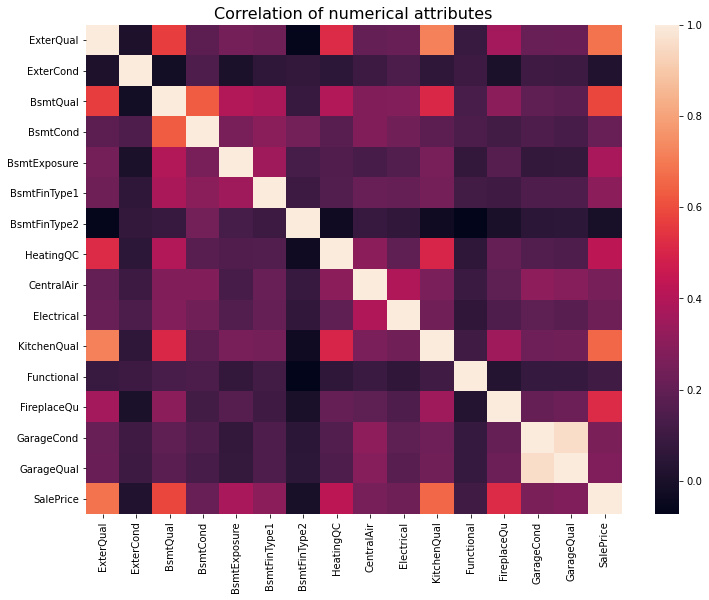

In [39]:
correlation2 = categorical_nums.corr()
f, ax = plt.subplots(figsize = (12,9))
plt.title('Correlation of numerical attributes', size = 16)
sns.heatmap(correlation2)
plt.show()

In [40]:
corrList_Order2 = correlation2['SalePrice'].sort_values(ascending=False)[0:]
corrList_Order2

SalePrice       1.000000
ExterQual       0.682639
KitchenQual     0.659600
BsmtQual        0.585207
FireplaceQu     0.520438
HeatingQC       0.427649
BsmtExposure    0.374696
BsmtFinType1    0.304908
GarageQual      0.273839
GarageCond      0.263191
CentralAir      0.251328
Electrical      0.227539
BsmtCond        0.212607
Functional      0.107619
ExterCond       0.018899
BsmtFinType2   -0.005323
Name: SalePrice, dtype: float64

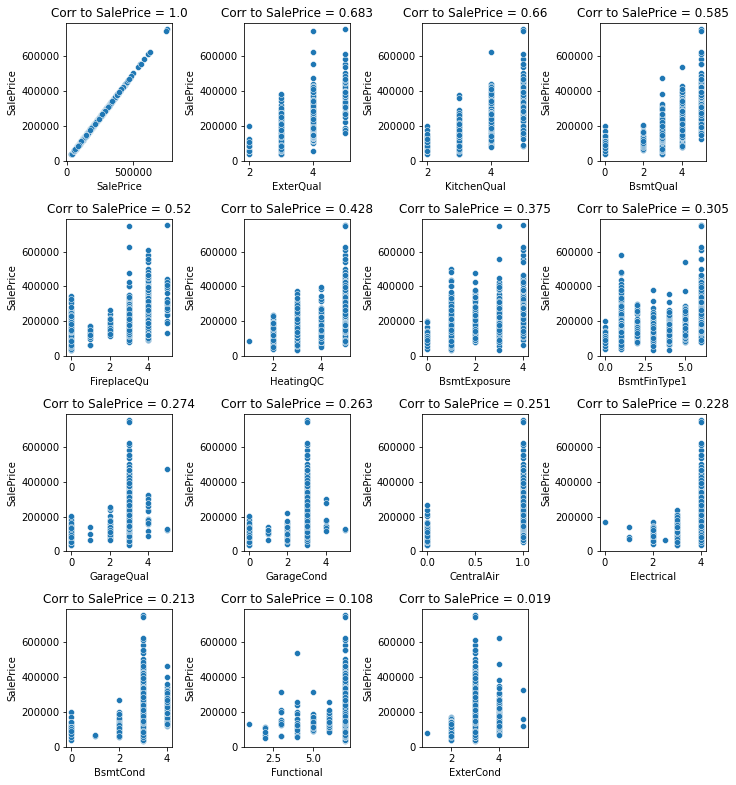

In [41]:
corr_to_price = correlation2['SalePrice']
f = plt.figure(figsize = (10,16))
for i in range(len(categorical_nums.columns) - 1):
    f.add_subplot(6, 4, i + 1)
    sns.scatterplot(categorical_nums.loc[:, corrList_Order2.index[i]], label)
    plt.title('Corr to SalePrice = '+ str(np.around(corrList_Order2[i], decimals = 3)))
plt.tight_layout()
plt.show()

In [42]:
# check how many year houses in data were sold
df_train.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010])

#  4) Model Setup 
## * prepro function is for processing X data with many feature engineering work, however, it does not work better than simple method prepro_simple.
## * The different data processes includes: column removal, date analysis (divide the MoSold into quarters), one-hot encoding, imputer, which is very important to fill numerical data by fit_transform. 
## * indicator column is created for those data not applicable, shuch as for house without remodel, without garage.

In [43]:
def prepro_simple(X):
    
        #X=XX.copy()
    NumCol_drop=[#  'YrSold',# 'MoSold', #'MSSubClass',
                 'MiscVal','BsmtHalfBath',#'LowQualFinSF',
                 #,'BsmtFullBath','HalfBath','BedroomAbvGr',
                 '3SsnPorch','PoolArea' #, #low correlaton
                 #,'GarageYrBlt'
                ]#,'GarageArea']# 'TotRmsAbvGrd'] # high corr with other attributes
    X.drop(NumCol_drop, axis = 1, inplace = True)

   # X.MasVnrArea = X.MasVnrArea.fillna(0)
    
    #change MSSubClass to categorical , use 'object' instead of 'category'
    X.MSSubClass = X.MSSubClass.astype('object')
#    X.OverallCond=X.OverallCond.astype('object')
    
    # Remove attributes that were identified for excluding when viewing scatter plots & corr values
    categorical_attributes_drop = [
                           'Alley','ExterCond','BsmtFinType2','PoolQC','Fence',#
                           #         'Exterior1st','Exterior2nd',# 'Neighborhood',  #too many, but I got better results with them
                       'GarageArea',  'TotRmsAbvGrd'] #,'GarageYrBlt',] # high corr with other attributes
    X.drop(categorical_attributes_drop, axis=1, inplace=True)
    
    temp = X['GarageYrBlt'] - X['YearBuilt']
  #  X.GarageYrBlt=(X.GarageYrBlt-year_low)/100
    ind = [0 if i < 0.1 else 1 for i in temp]
    dat = pd.DataFrame({'ReGarageYrBlt_ind': ind})
    dat.index = np.arange(1,len(dat)+1)
    X['ReGarageYrBlt_ind']=dat
   
        ######### bin date into 4 quarters at 5 years, 20 bins.
    #Year 2006-2010
  # feature_column=['20061','20062','20063','20064','20071','20072','20073','20074',
   #                '20081','20082','20083','20084','20091','20092','20093','20094',
    #               '20101','20102','20103','20104'] 
    feature_column = ['Q1','Q2','Q3','Q4']
    d = pd.DataFrame(0, index=np.arange(len(X.MoSold))+1, columns=feature_column)

    for i in X.index: 
        temp = X.MoSold[i]
        if  temp > 2 and temp < 6:
            tempQ=2
        elif temp > 5 and temp < 9:
            tempQ = 3
        elif temp > 8 and temp < 12:
            tempQ = 4
        else:
            tempQ = 1
        tempQ = int(tempQ)
    #    tempY=int(X.YrSold[i])
     #   assert type(tempQ)=='int'
     #   d[str(tempY)+str(tempQ)][i]=1
        d['Q'+str(tempQ)][i] = 1
    d.index.name = 'Id'
    d.astype('int')
    X = X.join(d)
    X.drop(['MoSold'], axis = 1, inplace=True) 

##########################################################################
    # Categorical columns:
    cat_cols_fill_none = ['MiscFeature',  'FireplaceQu', #'Fence','Alley', 'PoolQC',  'BsmtFinType2',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']
    for cat in cat_cols_fill_none:
         X[cat] = X[cat].fillna("None")
            
    #outlier change
    LotFrontage_upper = 200
    X.LotFrontage.clip(upper = LotFrontage_upper)
    LotArea_upper = 50000
    X.LotArea.clip(upper = LotArea_upper)       
    BsmtFinSF1_upper = 4000
    X.BsmtFinSF1.clip(upper = BsmtFinSF1_upper)  
    TotalBsmtSF_upper = 6000
    X.TotalBsmtSF.clip(upper = TotalBsmtSF_upper)
    FstFlrSF_upper = 4000
    X['1stFlrSF'].clip(upper = FstFlrSF_upper)
    LowQualFinSF_upper=550
    X.LowQualFinSF.clip(upper = LowQualFinSF_upper)
    
    X = pd.get_dummies(X)
    
    return X

In [44]:
#batch 1 for numeric cols

X = df_train.copy()

########special for training for SalePrice outlier
X = X.drop(X.GrLivArea[(X['GrLivArea'] > 4000) & (X['SalePrice'] < 300000)].index, axis = 0)
############3

print(X.shape)
X.dropna(axis = 0, subset = ['SalePrice'], inplace = True) #drop na row if X has na in Saleprice
print(X.shape)
Y = X.SalePrice
# data transformation
Y_log = np.log(Y)
X.drop(['SalePrice'], axis=1, inplace=True)
print(X.shape, Y.shape)
X

(1458, 80)
(1458, 80)
(1458, 79) (1458,)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal


In [45]:
#X=prepro(X)
X = prepro_simple(X)
X

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold,ReGarageYrBlt_ind,Q1,Q2,Q3,Q4,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFi

In [46]:
# check the missing data for impute.fit_transform to handle
X.isna().sum().sort_values(ascending = False).head(10)

LotFrontage          259
GarageYrBlt           81
MasVnrArea             8
Q4                     2
ReGarageYrBlt_ind      2
Q1                     2
Q2                     2
Q3                     2
HeatingQC_Gd           0
BsmtCond_TA            0
dtype: int64

# Training model:
## first, impute the data, train_test_split and try many different models

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
# Split into validation and training data

train_X, val_X, train_y, val_y = train_test_split(X, Y_log, random_state=1)
# Final imputation of missing data - to address those outstanding after previous section
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)

train_X.astype('float32')
train_y.astype('float32')
val_X.astype('float32')
val_y.astype('float32')

Id
1164    11.598727
112     12.100712
1274    12.083905
1148    12.069680
369     11.790557
          ...    
463     11.041048
304     11.917724
1264    12.103486
217     12.254863
857     11.898188
Name: SalePrice, Length: 365, dtype: float32

In [48]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [49]:
# function to inverse the values
def inv_y(low_y):
    return np.exp(low_y)

In [50]:
# Series to collate mean absolute errors for each algorithm
mae_compare = pd.Series()
mae_compare.index.name = 'Algorithm'

# Random Forest. Define the model. =============================
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(inv_y(rf_val_predictions), inv_y(val_y))

mae_compare['RandomForest'] = rf_val_mae

# XGBoost. Define the model. ======================================
xgb_model = XGBRegressor(n_estimators = 2000, learning_rate = 0.02)
xgb_model.fit(train_X, train_y, early_stopping_rounds=5, 
              eval_set=[(val_X,val_y)], verbose=False)
xgb_val_predictions = xgb_model.predict(val_X)
xgb_val_mae = mean_absolute_error(inv_y(xgb_val_predictions), inv_y(val_y))

mae_compare['XGBoost'] = xgb_val_mae

#Gradient Boosting Regression ==========================================
gbr_model = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.032, 
                                      max_depth = 4, random_state = 5)
gbr_model.fit(train_X, train_y)
gbr_val_predictions = gbr_model.predict(val_X)
gbr_val_mae = mean_absolute_error(inv_y(gbr_val_predictions), inv_y(val_y))

mae_compare['GradientBoosting'] = gbr_val_mae

# Linear Regression =================================================

linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
linear_val_predictions = linear_model.predict(val_X)
linear_val_mae = mean_absolute_error(inv_y(linear_val_predictions), inv_y(val_y))
mae_compare['LinearRegression'] = linear_val_mae


# Lasso ==============================================================
lasso_model = Lasso(alpha = 0.0002, random_state = 5)
lasso_model.fit(train_X, train_y)
lasso_val_predictions = lasso_model.predict(val_X)
lasso_val_mae = mean_absolute_error(inv_y(lasso_val_predictions), inv_y(val_y))

mae_compare['Lasso'] = lasso_val_mae
# print("Validation MAE for Lasso Model: {:,.0f}".format(lasso_val_mae))

# Ridge ===============================================================
ridge_model = Ridge(alpha=0.002, random_state=5)
ridge_model.fit(train_X, train_y)
ridge_val_predictions = ridge_model.predict(val_X)
ridge_val_mae = mean_absolute_error(inv_y(ridge_val_predictions), inv_y(val_y))

mae_compare['Ridge'] = ridge_val_mae
# print("Validation MAE for Ridge Regression Model: {:,.0f}".format(ridge_val_mae))

In [51]:
print('MAE values for different algorithms:')
mae_compare.sort_values(ascending = True).round()

MAE values for different algorithms:


Algorithm
Lasso               13822.0
GradientBoosting    14214.0
Ridge               14639.0
LinearRegression    14651.0
XGBoost             15146.0
RandomForest        16421.0
dtype: float64

*Lasso has smallest MAE values*

In [52]:
# Lasso ==============================================================
lasso_model = Lasso(alpha=0.0001, random_state=8)
lasso_model.fit(train_X, train_y)
lasso_val_predictions = lasso_model.predict(val_X)
lasso_val_mae = mean_absolute_error(inv_y(lasso_val_predictions), inv_y(val_y))

lasso_val_mae

13819.420655770728

In [53]:
# manual testing Gradient Boosting Regression ==========================================
gbr_model = GradientBoostingRegressor(n_estimators=700, learning_rate=0.02, 
                                      max_depth=4, random_state=5)
gbr_model.fit(train_X, train_y)
gbr_val_predictions = gbr_model.predict(val_X)
gbr_val_mae = mean_absolute_error(inv_y(gbr_val_predictions), inv_y(val_y))

gbr_val_mae

14456.882945598922

In [54]:
# manually XGBoost. Define the model. ======================================
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.02, max_depth=6, reg_lambda=1, reg_alpha=0)
xgb_model.fit(train_X, train_y, early_stopping_rounds=5, 
              eval_set=[(val_X,val_y)], verbose=False)
xgb_val_predictions = xgb_model.predict(val_X)
xgb_val_mae = mean_absolute_error(inv_y(xgb_val_predictions), inv_y(val_y))

xgb_val_mae

15146.443343321918

## use cross_validation to compare those results

In [55]:
imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)
n_folds = 10

In [56]:
from sklearn.model_selection import cross_val_score

lasso_model = Lasso(alpha = 0.0003, random_state = 5)
# =========================================================================
scores = cross_val_score(lasso_model, imputed_X,Y_log, scoring = 'neg_mean_squared_error', 
                         cv = n_folds)
lasso_mae_scores = np.sqrt(-scores)

print('For LASSO model:')
# print(lasso_mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(lasso_mae_scores.mean().round(decimals=4)))
print('Error std deviation = ' +str(lasso_mae_scores.std().round(decimals=3)))

For LASSO model:
Mean RMSE = 0.1095
Error std deviation = 0.015


In [57]:
gbr_model = GradientBoostingRegressor(n_estimators = 700, learning_rate = 0.02, 
                                      max_depth = 4, random_state = 5)
scores = cross_val_score(gbr_model, imputed_X,Y_log, scoring = 'neg_mean_squared_error', 
                         cv = n_folds)
mae_scores = np.sqrt(-scores)

print('For GradientBoost model:')
# print(mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(mae_scores.std().round(decimals=3)))

For GradientBoost model:
Mean RMSE = 0.119
Error std deviation = 0.017


In [58]:
xgb_model = XGBRegressor(n_estimators = 500, learning_rate = 0.05)
scores = cross_val_score(xgb_model, imputed_X,Y_log, scoring = 'neg_mean_squared_error', 
                         cv = n_folds)
mae_scores = np.sqrt(-scores)

print('For XGBoost model:')
# print(mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(mae_scores.mean().round(decimals = 3)))
print('Error std deviation = ' +str(mae_scores.std().round(decimals = 3)))

For XGBoost model:
Mean RMSE = 0.118
Error std deviation = 0.018


## hyper-parameter grid scan

In [59]:
def buildModel_XGB(n_estimators, learning_rate, n_jobs):
    my_model = XGBRegressor(n_estimators = n_estimators, learning_rate = learning_rate, n_jobs = n_jobs)

    my_model.fit(train_X, train_y) 
    predictions = my_model.predict(val_X)
    mae = mean_absolute_error(predictions, val_y)
    return mae

In [60]:
def buildModel_LASSO(al):
    my_model = XGBRegressor(alpha = al, random_state = 8 )

    my_model.fit(train_X, train_y) 
    predictions = my_model.predict(val_X)
    mae = mean_absolute_error(predictions, val_y)
    return mae

parameters = []
result = []
for ne in [200, 500, 1000]:
     for lr in [0.01, 0.02, 0.05]:
            parameters.append([ne, lr, 1])
for p in parameters:
         r = buildModel(p[0], p[1], p[2])
         print(p, r)
         result.append(r)

In [61]:
# alpha = 0.00015
parameters = []
result = []
for al in [0.00008,0.0001,0.00012,0.00015, 0.0002, 0.0003,0.0005,0.0008,0.001,0.0012,0.002,0.003,0.005,0.006,0.007]:
            parameters.append(al)
for p in parameters:
         r = buildModel_LASSO(p)
         print(p, r)
         result.append(r)

8e-05 0.09275052996021285
0.0001 0.09154708344387316
0.00012 0.09158623114302475
0.00015 0.09152118892483457
0.0002 0.09158804769777698
0.0003 0.0920396107134978
0.0005 0.09055242023321272
0.0008 0.09051944966759355
0.001 0.09195231566504988
0.0012 0.0907586433330682
0.002 0.0934342125163085
0.003 0.09151411192723481
0.005 0.09159592250675405
0.006 0.0935761542708082
0.007 0.09288402079321217


# 5) Model submission
## ***important align the data with training data, because the column number could be different after one-hot encoding

In [62]:
df_test.isna().sum().sort_values(ascending = False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Functional         2
dtype: int64

In [63]:
X_test = df_test.copy()

#X_test= prepro(X_test)
X_test = prepro_simple(X_test)
final_train, final_test = X.align(X_test, join = 'left', axis = 1)
#final_test_imputed = my_imputer.transform(final_test)

In [64]:
#final_train, final_test = X.align(X_test, join='left', axis=1)
final_cols = [cname for cname in final_test.columns ]   
for cat in final_cols:
         final_test[cat] =  final_test[cat].fillna(0)
print('Null in the train table after reshape=',final_train.isna().sum().sum())
print('Null in the test table after reshape=',final_test.isna().sum().sum())

Null in the train table after reshape= 358
Null in the test table after reshape= 0


In [65]:
# Create final model
# Best model = Lasso &XGboost
#final_model = Lasso(alpha=0.0005, random_state=5)
#final_model = XGBRegressor(n_estimators=2000, learning_rate=0.02)
#final_model = xgb_model
#final_model = GradientBoostingRegressor(n_estimators=700, learning_rate=0.02, 
  #                                    max_depth=4, random_state=5)
# Create model - on full set of data (training & validation)
# Best model = Lasso?
final_model = Lasso(alpha = 0.00015, random_state = 5)

final_train_imputed = my_imputer.fit_transform(final_train, Y_log)
final_test_imputed = my_imputer.transform(final_test)
# Fit the model using all the data - train it on all of X and y

final_model.fit(final_train_imputed, Y_log)

Lasso(alpha=0.00015, random_state=5)

In [66]:
# Fit the model using all the data - train it on all of X and y
final_model.fit(final_train_imputed, Y_log)
predictions = final_model.predict(val_X) 
mae = mean_absolute_error(predictions, val_y)
mae #low because leakage, just to confirm model has not problem

0.07105340252831809

In [67]:
df_test.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [68]:
# make predictions which we will submit. 
test_preds = final_model.predict(final_test_imputed)

# The lines below shows you how to save your data in the format needed to score it in the competition
# Reminder: predictions are in log(SalePrice). Need to inverse-transform.
output = pd.DataFrame({'Id': df_test.index,
                       'SalePrice': inv_y(test_preds)})

output.to_csv('submission.csv', index = False)

In [69]:
inv_y(test_preds)

array([115798.14872201, 153269.62293422, 180793.31934208, ...,
       169008.73901992, 116502.70203566, 218369.61312753])